# Forecasting Housing Prices using Zillow data

In [2]:
import pandas as pd 
import nasdaqdatalink

### Nasdaq API

In [3]:
import requests

url = "https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA?indicator_id=ZSFH&region_id=99999&api_key=6bDaCczuuxse_PyZQAxT"
response = requests.get(url)

In [4]:
if response.status_code == 200:
    json_data = response.json()
    datatable = json_data.get('datatable', {})
    data = datatable.get('data', [])
    columns = [col['name'] for col in datatable.get('columns', [])]

    df = pd.DataFrame(data, columns=columns)
    
    print(df.head())
else:
    print("Error fetching data:", response.status_code)

  indicator_id region_id        date          value
0         ZSFH     99999  2025-01-31  457847.242831
1         ZSFH     99999  2024-12-31  457250.597887
2         ZSFH     99999  2024-11-30  456891.816779
3         ZSFH     99999  2024-10-31  456998.542716
4         ZSFH     99999  2024-09-30  456517.913569


In [5]:
df.shape

(241, 4)

### CONTINUE

In [6]:
nasdaqdatalink.ApiConfig.api_key = '6bDaCczuuxse_PyZQAxT'

In [7]:
df_indicator = nasdaqdatalink.get_table(datatable_code='ZILLOW/INDICATORS')

In [8]:
df_indicator

,indicator_id,indicator,category
None,,,
0,ZSFH,ZHVI Single-Family Homes Time Series ($),Home values
1,ZCON,ZHVI Condo/Co-op Time Series ($),Home values
2,ZATT,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
4,ZABT,ZHVI All Homes- Bottom Tier Time Series ($),Home values
5,Z5BR,ZHVI 5+ Bedroom Time Series ($),Home values
6,Z4BR,ZHVI 4-Bedroom Time Series ($),Home values
7,Z3BR,ZHVI 3-Bedroom Time Series ($),Home values
8,Z2BR,ZHVI 2-Bedroom Time Series ($),Home values


In [9]:
df_region = nasdaqdatalink.get_table(datatable_code='ZILLOW/REGIONS', paginate=True)

In [10]:
df_region

,region_id,region_type,region
None,,,
0,99999,zip,"98847;WA;Wenatchee, WA;Leavenworth;Chelan County"
1,99998,zip,98846;WA;nan;Pateros;Okanogan County
2,99997,zip,98845; WA; Wenatchee; Douglas County; Palisades
3,99996,zip,98844;WA;nan;Oroville;Okanogan County
4,99995,zip,"98843;WA;Wenatchee, WA;Orondo;Douglas County"
...,...,...,...
89300,100000,zip,"98848;WA;Moses Lake, WA;Quincy;Grant County"
89301,10000,city,Bloomington;MD;nan;Garrett County
89302,1000,county,"Echols County;GA;Valdosta, GA"


In [11]:
df_region_zip = df_region[df_region['region_type'] == 'zip'].copy()

print(df_region_zip.head())


     region_id region_type                                            region
None                                                                        
0        99999         zip  98847;WA;Wenatchee, WA;Leavenworth;Chelan County
1        99998         zip              98846;WA;nan;Pateros;Okanogan County
2        99997         zip   98845; WA; Wenatchee; Douglas County; Palisades
3        99996         zip             98844;WA;nan;Oroville;Okanogan County
4        99995         zip      98843;WA;Wenatchee, WA;Orondo;Douglas County


In [12]:
df_region_zip.shape

(31592, 3)

In [13]:
df_region_zip = df_region[df_region['region_type'] == 'zip'].copy()
split_columns = df_region_zip['region'].str.split(';', expand=True)
split_columns.columns = ['zip code', 'state', 'city, state', 'city', 'county']
df_region_zip = df_region_zip.join(split_columns)

In [14]:
df_region_zip[['region_id', 'region', 'zip code', 'state', 'city, state', 'city', 'county']].head(20)

,region_id,region,zip code,state,"city, state",city,county
None,,,,,,,
0,99999,"98847;WA;Wenatchee, WA;Leavenworth;Chelan County",98847,WA,"Wenatchee, WA",Leavenworth,Chelan County
1,99998,98846;WA;nan;Pateros;Okanogan County,98846,WA,nan,Pateros,Okanogan County
2,99997,98845; WA; Wenatchee; Douglas County; Palisades,98845,WA,Wenatchee,Douglas County,Palisades
3,99996,98844;WA;nan;Oroville;Okanogan County,98844,WA,nan,Oroville,Okanogan County
4,99995,"98843;WA;Wenatchee, WA;Orondo;Douglas County",98843,WA,"Wenatchee, WA",Orondo,Douglas County
5,99994,98841;WA;nan;Omak;Okanogan County,98841,WA,nan,Omak,Okanogan County
6,99993,98840;WA;nan;Okanogan;Okanogan County,98840,WA,nan,Okanogan,Okanogan County
7,99992,"98837;WA;Moses Lake, WA;Moses Lake;Grant County",98837,WA,"Moses Lake, WA",Moses Lake,Grant County
8,99991,"98836; WA; Wenatchee, WA; Chelan County; Cashmere",98836,WA,"Wenatchee, WA",Chelan County,Cashmere


### Merging with df_region_zip and ZILLOW_DATA

In [15]:
region_ids = df_region_zip['region_id'].tolist()

In [16]:
df1 = pd.read_csv('/Users/heonkim/Desktop/capstone2 works /ZILLOW_DATA_962c837a6ccefddddf190101e0bafdaf.csv')
df1.head()

,indicator_id,region_id,date,value
0,ZATT,3101,1998-01-31,338849.0
1,ZATT,3101,1998-02-28,342993.0
2,ZATT,3101,1998-03-31,346763.0
3,ZATT,3101,1998-04-30,349356.0
4,ZATT,3101,1998-05-31,351981.0


In [17]:
df1.shape

(157888787, 4)

In [18]:
df_region_zip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31592 entries, 0 to 89300
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   region_id    31592 non-null  object
 1   region_type  31592 non-null  object
 2   region       31592 non-null  object
 3   zip code     31592 non-null  object
 4   state        31592 non-null  object
 5   city, state  31592 non-null  object
 6   city         31504 non-null  object
 7   county       29278 non-null  object
dtypes: object(8)
memory usage: 2.2+ MB


In [19]:
df1['region_id'] = df1['region_id'].astype(str)

In [20]:
merged_df = pd.merge(df_region_zip, df1, on='region_id', how='left')
merged_df.head()


,region_id,region_type,region,zip code,state,"city, state",city,county,indicator_id,date,value
0,99999,zip,"98847;WA;Wenatchee, WA;Leavenworth;Chelan County",98847,WA,"Wenatchee, WA",Leavenworth,Chelan County,ZCON,2021-04-30,292462.0
1,99999,zip,"98847;WA;Wenatchee, WA;Leavenworth;Chelan County",98847,WA,"Wenatchee, WA",Leavenworth,Chelan County,ZCON,2021-03-31,287222.0
2,99999,zip,"98847;WA;Wenatchee, WA;Leavenworth;Chelan County",98847,WA,"Wenatchee, WA",Leavenworth,Chelan County,ZCON,2020-06-30,265510.0
3,99999,zip,"98847;WA;Wenatchee, WA;Leavenworth;Chelan County",98847,WA,"Wenatchee, WA",Leavenworth,Chelan County,Z5BR,2021-04-30,761135.0
4,99999,zip,"98847;WA;Wenatchee, WA;Leavenworth;Chelan County",98847,WA,"Wenatchee, WA",Leavenworth,Chelan County,Z5BR,2021-03-31,748608.0


In [21]:
merged_df.shape

(52132252, 11)

In [22]:
merged_df.isnull().sum()

region_id             0
region_type           0
region                0
zip code              0
state                 0
city, state           0
city              43540
county          1067400
indicator_id          0
date                  0
value                 0
dtype: int64

In [23]:
merged_df = merged_df.dropna(subset=['city'])
merged_df = merged_df.drop(['county'], axis=1)

In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52088712 entries, 0 to 52132251
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   region_id     object 
 1   region_type   object 
 2   region        object 
 3   zip code      object 
 4   state         object 
 5   city, state   object 
 6   city          object 
 7   indicator_id  object 
 8   date          object 
 9   value         float64
dtypes: float64(1), object(9)
memory usage: 4.3+ GB


In [25]:
merged_df.head()

,region_id,region_type,region,zip code,state,"city, state",city,indicator_id,date,value
0,99999,zip,"98847;WA;Wenatchee, WA;Leavenworth;Chelan County",98847,WA,"Wenatchee, WA",Leavenworth,ZCON,2021-04-30,292462.0
1,99999,zip,"98847;WA;Wenatchee, WA;Leavenworth;Chelan County",98847,WA,"Wenatchee, WA",Leavenworth,ZCON,2021-03-31,287222.0
2,99999,zip,"98847;WA;Wenatchee, WA;Leavenworth;Chelan County",98847,WA,"Wenatchee, WA",Leavenworth,ZCON,2020-06-30,265510.0
3,99999,zip,"98847;WA;Wenatchee, WA;Leavenworth;Chelan County",98847,WA,"Wenatchee, WA",Leavenworth,Z5BR,2021-04-30,761135.0
4,99999,zip,"98847;WA;Wenatchee, WA;Leavenworth;Chelan County",98847,WA,"Wenatchee, WA",Leavenworth,Z5BR,2021-03-31,748608.0


### Selecting Regions commutable to Chicago (5 miles to 50 miles) using uszips.csv data

In [26]:
location = pd.read_csv('/Users/heonkim/Desktop/capstone2 works /uszips.csv')
location

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,16721.0,100.2,72001,Adjuntas,"{""72001"": 98.74, ""72141"": 1.26}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37510.0,477.6,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,48317.0,543.1,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,5435.0,47.3,72093,Maricao,"{""72093"": 82.27, ""72153"": 11.66, ""72121"": 6.06}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,25413.0,264.4,72011,Añasco,"{""72011"": 96.71, ""72099"": 2.82, ""72083"": 0.37,...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33778,99923,55.98043,-130.03803,Hyder,AK,Alaska,True,NaN,25.0,0.6,2198,Prince of Wales-Hyder,"{""02198"": 100}",Prince of Wales-Hyder,02198,False,False,America/Sitka
33779,99925,55.55398,-132.96276,Klawock,AK,Alaska,True,NaN,854.0,6.1,2198,Prince of Wales-Hyder,"{""02198"": 100}",Prince of Wales-Hyder,02198,False,False,America/Sitka
33780,99926,55.12617,-131.48928,Metlakatla,AK,Alaska,True,NaN,1385.0,4.0,2198,Prince of Wales-Hyder,"{""02198"": 100}",Prince of Wales-Hyder,02198,False,False,America/Metlakatla
33781,99927,56.33305,-133.60044,Point Baker,AK,Alaska,True,NaN,18.0,1.5,2198,Prince of Wales-Hyder,"{""02198"": 100}",Prince of Wales-Hyder,02198,False,False,America/Sitka


In [27]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33783 entries, 0 to 33782
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   zip               33783 non-null  int64  
 1   lat               33783 non-null  float64
 2   lng               33783 non-null  float64
 3   city              33783 non-null  object 
 4   state_id          33783 non-null  object 
 5   state_name        33783 non-null  object 
 6   zcta              33783 non-null  bool   
 7   parent_zcta       0 non-null      float64
 8   population        33764 non-null  float64
 9   density           33764 non-null  float64
 10  county_fips       33783 non-null  int64  
 11  county_name       33783 non-null  object 
 12  county_weights    33783 non-null  object 
 13  county_names_all  33783 non-null  object 
 14  county_fips_all   33783 non-null  object 
 15  imprecise         33783 non-null  bool   
 16  military          33783 non-null  bool  

In [28]:
merged_df['zip code'] = merged_df['zip code'].astype(str)
location['zip'] = location['zip'].astype(str)

In [29]:
zillow_location_housing = merged_df.merge(location[['zip', 'lat', 'lng']], 
                                    left_on='zip code', 
                                    right_on='zip', 
                                    how='left')

In [30]:
zillow_location_housing

,region_id,region_type,region,zip code,state,"city, state",city,indicator_id,date,value,zip,lat,lng
0,99999,zip,"98847;WA;Wenatchee, WA;Leavenworth;Chelan County",98847,WA,"Wenatchee, WA",Leavenworth,ZCON,2021-04-30,292462.000000,98847,47.42236,-120.62152
1,99999,zip,"98847;WA;Wenatchee, WA;Leavenworth;Chelan County",98847,WA,"Wenatchee, WA",Leavenworth,ZCON,2021-03-31,287222.000000,98847,47.42236,-120.62152
2,99999,zip,"98847;WA;Wenatchee, WA;Leavenworth;Chelan County",98847,WA,"Wenatchee, WA",Leavenworth,ZCON,2020-06-30,265510.000000,98847,47.42236,-120.62152
3,99999,zip,"98847;WA;Wenatchee, WA;Leavenworth;Chelan County",98847,WA,"Wenatchee, WA",Leavenworth,Z5BR,2021-04-30,761135.000000,98847,47.42236,-120.62152
4,99999,zip,"98847;WA;Wenatchee, WA;Leavenworth;Chelan County",98847,WA,"Wenatchee, WA",Leavenworth,Z5BR,2021-03-31,748608.000000,98847,47.42236,-120.62152
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52088707,100000,zip,"98848;WA;Moses Lake, WA;Quincy;Grant County",98848,WA,"Moses Lake, WA",Quincy,Z4BR,2013-05-31,184745.285888,98848,47.17182,-119.84109
52088708,100000,zip,"98848;WA;Moses Lake, WA;Quincy;Grant County",98848,WA,"Moses Lake, WA",Quincy,ZSFH,2019-07-31,256087.025041,98848,47.17182,-119.84109
52088709,100000,zip,"98848;WA;Moses Lake, WA;Quincy;Grant County",98848,WA,"Moses Lake, WA",Quincy,Z4BR,2016-11-30,213545.375163,98848,47.17182,-119.84109
52088710,100000,zip,"98848;WA;Moses Lake, WA;Quincy;Grant County",98848,WA,"Moses Lake, WA",Quincy,Z1BR,2023-11-30,295241.414238,98848,47.17182,-119.84109


In [31]:
zillow_location_housing.isnull().sum()

region_id            0
region_type          0
region               0
zip code             0
state                0
city, state          0
city                 0
indicator_id         0
date                 0
value                0
zip             297879
lat             297879
lng             297879
dtype: int64

In [32]:
zillow_location_housing.shape

(52088712, 13)

### Haversine Function - The formula to compute the great-circle distance between two points (in miles) using their latitude and longitude.

In [33]:
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 3958.8  # Earth radius in miles
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [34]:
# Chicago's coordinates
chicago_lat = 41.8781
chicago_lon = -87.6298

# Calculate distance using the Haversine function
zillow_location_housing['distance_to_chicago_in_miles'] = zillow_location_housing.apply(
    lambda row: haversine_distance(chicago_lat, chicago_lon, row['lat'], row['lng'])
                if pd.notnull(row['lat']) and pd.notnull(row['lng']) else None, 
    axis=1
)

In [35]:
zillow_location_housing_selected_regions = zillow_location_housing[(zillow_location_housing['distance_to_chicago_in_miles'] >= 1) & 
                              (zillow_location_housing['distance_to_chicago_in_miles'] <= 50)]


In [36]:
zillow_location_housing_selected_regions

,region_id,region_type,region,zip code,state,"city, state",city,indicator_id,date,value,zip,lat,lng,distance_to_chicago_in_miles
17050110,84735,zip,"60954;IL;Kankakee, IL;Momence;Kankakee County",60954,IL,"Kankakee, IL",Momence,Z5BR,2021-04-30,171735.000000,60954,41.15446,-87.62827,49.999313
17050111,84735,zip,"60954;IL;Kankakee, IL;Momence;Kankakee County",60954,IL,"Kankakee, IL",Momence,Z5BR,2021-03-31,169315.000000,60954,41.15446,-87.62827,49.999313
17050112,84735,zip,"60954;IL;Kankakee, IL;Momence;Kankakee County",60954,IL,"Kankakee, IL",Momence,ZCON,2020-08-31,148033.000000,60954,41.15446,-87.62827,49.999313
17050113,84735,zip,"60954;IL;Kankakee, IL;Momence;Kankakee County",60954,IL,"Kankakee, IL",Momence,ZCON,2020-07-31,145793.000000,60954,41.15446,-87.62827,49.999313
17050114,84735,zip,"60954;IL;Kankakee, IL;Momence;Kankakee County",60954,IL,"Kankakee, IL",Momence,ZCON,2020-06-30,143363.000000,60954,41.15446,-87.62827,49.999313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51619507,399602,zip,"60124;IL;Chicago-Naperville-Elgin, IL-IN-WI;El...",60124,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Elgin,ZSFH,2019-05-31,318065.980979,60124,42.02621,-88.39691,40.724894
51619508,399602,zip,"60124;IL;Chicago-Naperville-Elgin, IL-IN-WI;El...",60124,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Elgin,Z4BR,2018-05-31,333577.496037,60124,42.02621,-88.39691,40.724894
51619509,399602,zip,"60124;IL;Chicago-Naperville-Elgin, IL-IN-WI;El...",60124,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Elgin,ZSFH,2021-04-30,346640.267106,60124,42.02621,-88.39691,40.724894
51619510,399602,zip,"60124;IL;Chicago-Naperville-Elgin, IL-IN-WI;El...",60124,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Elgin,ZSFH,2021-11-30,371618.586469,60124,42.02621,-88.39691,40.724894


In [37]:
zillow_location_housing_selected_regions.isnull().sum()

region_id                       0
region_type                     0
region                          0
zip code                        0
state                           0
city, state                     0
city                            0
indicator_id                    0
date                            0
value                           0
zip                             0
lat                             0
lng                             0
distance_to_chicago_in_miles    0
dtype: int64

In [38]:
zillow_location_housing_selected_regions.shape

(836647, 14)

In [39]:
zillow_location_housing_selected_regions.to_csv('final_dataset.csv', index=False)

In [40]:
zillow_location_housing_selected_regions.sort_values('date', ascending=True, inplace=True)
zillow_location_housing_selected_regions

/var/folders/vr/txw5f_kj4h9653_2bzcpzn6w0000gn/T/ipykernel_24926/1498121340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_location_housing_selected_regions.sort_values('date', ascending=True, inplace=True)


,region_id,region_type,region,zip code,state,"city, state",city,indicator_id,date,value,zip,lat,lng,distance_to_chicago_in_miles
17884538,84283,zip,"60014;IL;Chicago-Naperville-Elgin, IL-IN-WI;Cr...",60014,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Crystal Lake,ZALL,1996-01-31,162399.000000,60014,42.23126,-88.32679,43.289736
17406627,84527,zip,"60476;IL;Chicago-Naperville-Elgin, IL-IN-WI;Th...",60476,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Thornton,ZALL,1996-01-31,104195.000000,60476,41.56940,-87.60562,21.365765
17471356,84498,zip,"60447;IL;Chicago-Naperville-Elgin, IL-IN-WI;Mi...",60447,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Minooka,ZCON,1996-01-31,110029.000000,60447,41.48796,-88.32498,44.871664
17406352,84527,zip,"60476;IL;Chicago-Naperville-Elgin, IL-IN-WI;Th...",60476,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Thornton,ZSFH,1996-01-31,103980.000000,60476,41.56940,-87.60562,21.365765
17187665,84630,zip,"60629;IL;Chicago-Naperville-Elgin, IL-IN-WI;Ch...",60629,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Chicago,ZSFH,1996-01-31,89838.000000,60629,41.77540,-87.71239,8.272513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17201225,84626,zip,"60624;IL;Chicago-Naperville-Elgin, IL-IN-WI;Ch...",60624,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Chicago,Z4BR,2025-01-31,206246.356699,60624,41.88045,-87.72366,4.831284
25020373,78097,zip,"46327;IN;Chicago-Naperville-Elgin, IL-IN-WI;Ha...",46327,IN,"Chicago-Naperville-Elgin, IL-IN-WI",Hammond,Z3BR,2025-01-31,154972.558545,46327,41.64048,-87.50677,17.600114
25030365,78091,zip,"46320;IN;Chicago-Naperville-Elgin, IL-IN-WI;Ha...",46320,IN,"Chicago-Naperville-Elgin, IL-IN-WI",Hammond,ZALL,2025-01-31,128086.840763,46320,41.60893,-87.49754,19.808551
17093657,84695,zip,"60827;IL;Chicago-Naperville-Elgin, IL-IN-WI;Ri...",60827,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Riverdale,Z4BR,2025-01-31,144231.410256,60827,41.64967,-87.63013,15.783173


### Clustering the city, state and its values that are distributed by 5 miles to 50 miles regions

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

bins = list(range(0, 51, 10)) 
labels = [f"{bins[i]}-{bins[i+1]} miles" for i in range(len(bins)-1)]
zillow_location_housing_selected_regions['distance_bin'] = pd.cut(
    zillow_location_housing_selected_regions['distance_to_chicago_in_miles'],
    bins=bins, labels=labels, include_lowest=True
)
tier_series = {}

bins_grouped = zillow_location_housing_selected_regions.groupby('distance_bin')
for bin_label, group in bins_grouped:
    if group.empty:
        continue
    
    q75_val = group['value'].quantile(0.85)
    
    filtered = group[group['value'] < q75_val].copy()
    if filtered.empty:
        print(f"No data in bin {bin_label} after filtering below the 75th percentile.")
        continue
    
    filtered['date'] = pd.to_datetime(filtered['date'])
    
    series = filtered.groupby('date')['value'].mean()
    tier_series[bin_label] = series

/var/folders/vr/txw5f_kj4h9653_2bzcpzn6w0000gn/T/ipykernel_24926/2895775794.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_location_housing_selected_regions['distance_bin'] = pd.cut(
/var/folders/vr/txw5f_kj4h9653_2bzcpzn6w0000gn/T/ipykernel_24926/2895775794.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bins_grouped = zillow_location_housing_selected_regions.groupby('distance_bin')


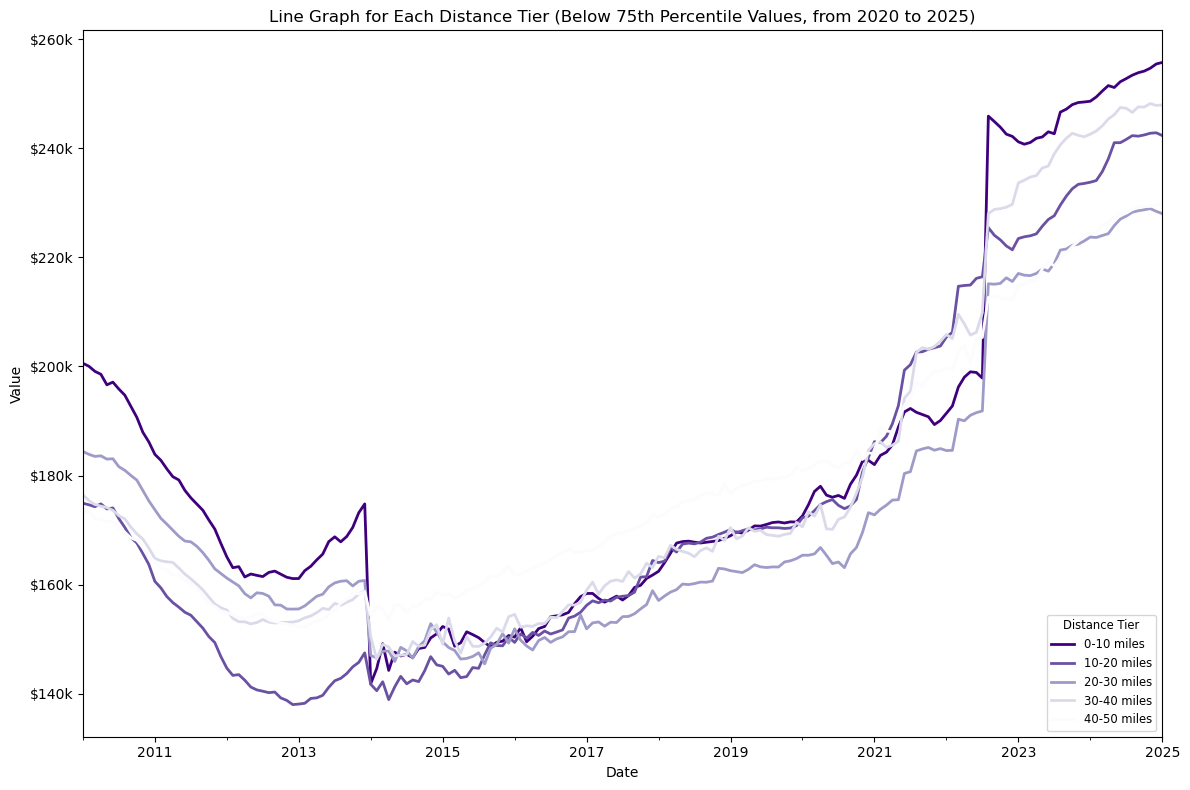

In [42]:
df_tiers = pd.DataFrame(tier_series).sort_index()
df_tiers = df_tiers[df_tiers.index >= '2010-01-01']
fig, ax = plt.subplots(figsize=(12, 8))

df_tiers.plot(
    ax=ax,
    linewidth=2,
    colormap="Purples_r",   
    # marker='o',           # or remove marker if you want lines only
    markersize=3
)

def thousands_formatter(x, pos):
    return f'${x/1000:,.0f}k'
ax.yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

ax.set_title("Line Graph for Each Distance Tier (Below 75th Percentile Values, from 2020 to 2025)")
ax.set_xlabel("Date")
ax.set_ylabel("Value")

ax.legend(title="Distance Tier", loc='lower right', fontsize='small', title_fontsize='small')

plt.tight_layout()
plt.show()

### List city names for each tier

- Duplication removed as well

In [43]:
# List city names for each tier with duplicates removed and cleaned
for bin_label, group in bins_grouped:
    if group.empty:
        continue
    city_names = group['city'].dropna().apply(lambda x: x.strip())
    city_names = sorted(set(city_names))
    city_names = [city for city in city_names if city.lower() != 'nan' and city != '']
    print(f"Tier: {bin_label} -- Cities: {city_names}")


Tier: 0-10 miles -- Cities: ['Berwyn', 'Chicago', 'Cicero', 'Elmwood Park', 'Forest Park', 'Oak Park', 'River Forest']
Tier: 10-20 miles -- Cities: ['Addison', 'Alsip', 'Bellwood', 'Bensenville', 'Berkeley', 'Blue Island', 'Bridgeview', 'Broadview', 'Brookfield', 'Burbank', 'Calumet City', 'Chicago', 'Chicago Ridge', 'Clarendon Hills', 'Cook County', 'Crestwood', 'Des Plaines', 'Dolton', 'East Chicago', 'Elmhurst', 'Evanston', 'Evergreen Park', 'Franklin Park', 'Glencoe', 'Glenview', 'Golf', 'Hammond', 'Harvey', 'Harwood Heights', 'Hickory Hills', 'Hillside', 'Hinsdale', 'Hometown', 'Justice', 'Kenilworth', 'La Grange', 'La Grange Park', 'Lincolnwood', 'Lyons', 'Markham', 'Maywood', 'Melrose Park', 'Midlothian', 'Morton Grove', 'Niles', 'Northlake', 'Oak Brook', 'Oak Forest', 'Oak Lawn', 'Palos Heights', 'Palos Hills', 'Palos Park', 'Park Ridge', 'Posen', 'River Grove', 'Riverdale', 'Riverside', 'Robbins', 'Schiller Park', 'Skokie', 'South Holland', 'Stone Park', 'Summit', 'Villa Park'

### Forecast using ARIMA 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

import matplotlib.dates as mdates
import datetime

df = pd.read_csv('/Users/heonkim/Desktop/capstone2 works /final_dataset.csv')

bins = list(range(0, 51, 10)) 
labels = [f"{bins[i]}-{bins[i+1]} miles" for i in range(len(bins)-1)]
df['distance_bin'] = pd.cut(
    df['distance_to_chicago_in_miles'],
    bins=bins, labels=labels, include_lowest=True
)

df['date'] = pd.to_datetime(df['date'], errors='coerce')

#### Forecasting plot 1 : 20-30 miles range locations

In [3]:
distance_bin = "20-30 miles"
df_bin = df[df['distance_bin'] == distance_bin].copy()

In [4]:
df_ts = df_bin.groupby('date')['value'].mean().reset_index()

df_ts['date'] = pd.to_datetime(df_ts['date'], errors='coerce')
df_ts.set_index('date', inplace=True)
df_ts.sort_index(inplace=True)

In [5]:
model = ARIMA(df_ts['value'], order=(1,1,1))
model_fit = model.fit()

In [6]:
steps = 24  # or however many periods you need
forecast_values = model_fit.forecast(steps=steps)

In [7]:
last_date = df_ts.index[-1]     
future_dates = pd.date_range(start=last_date + pd.offsets.MonthEnd(1), 
                             periods=steps, 
                             freq='M')

In [8]:
# Put forecast into a DataFrame
forecast_df = pd.DataFrame({'value': forecast_values.values}, index=future_dates)

In [9]:
combined_df = pd.concat([df_ts[['value']], forecast_df])

In [10]:
start = datetime.datetime(2010, 1, 1)
end   = datetime.datetime(2026, 12, 31)

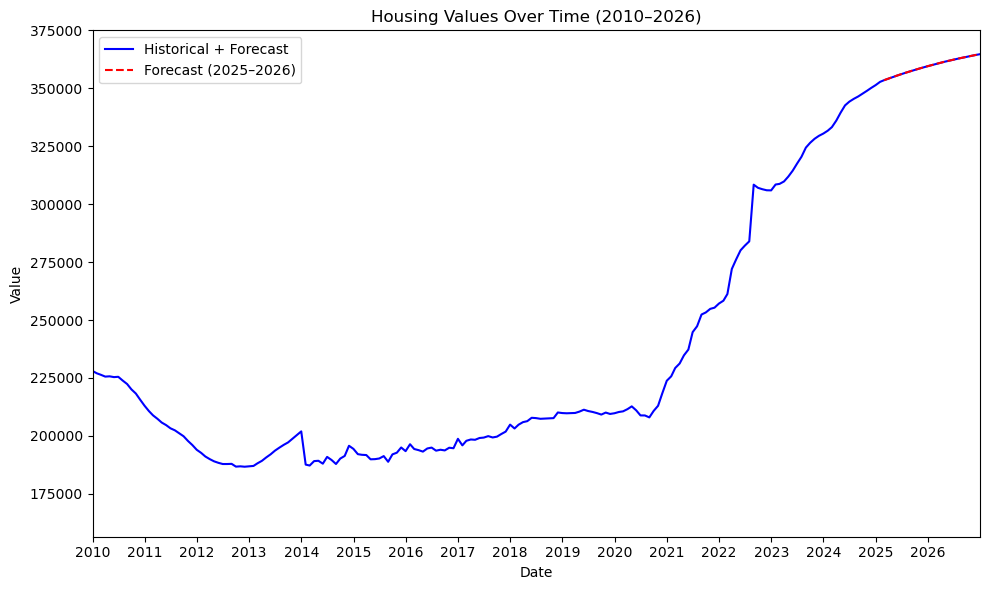

In [11]:
plt.figure(figsize=(10, 6))

plt.plot(combined_df.index, combined_df['value'], label='Historical + Forecast', color='blue')

plt.plot(forecast_df.index, forecast_df['value'], label='Forecast (2025–2026)', color='red', linestyle='--')

# Configure the x-axis with yearly ticks
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())         
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # label format: YYYY

# Restrict x-axis to 2010–2026
ax.set_xlim([start, end])

plt.title('Housing Values Over Time (2010–2026)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()


### 

### Visualization and results of the forecasted values for cities in the 20-30 miles Tier

In [25]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df_2030 = df[df['distance_bin'] == "20-30 miles"].copy()

df_2030['city'] = df_2030['city'].dropna().apply(lambda x: x.strip())

df_2030['date'] = pd.to_datetime(df_2030['date'], errors='coerce')

In [26]:
df_2024 = df_2030.loc[(df_2030['date'] >= '2024-01-01') & (df_2030['date'] <= '2024-12-31')].copy()
stats_2024 = (
    df_2024.groupby('city')['value']
    .agg(['mean', 'min', 'max'])
    .reset_index()
    .rename(columns={'mean': 'mean_2024', 'min': 'min_2024', 'max': 'max_2024'})
)

In [27]:
forecast_stats = []  # list to collect forecast stats per city
forecast_steps = 12

cities = df_2030['city'].unique()

for city in cities:
    # Filter historical data for the city (use all available data)
    city_data = df_2030[df_2030['city'] == city].copy()
    city_data = city_data.sort_values('date')
    
    # Use only the 'date' and 'value' columns and set date as index
    city_data.set_index('date', inplace=True)
    
    # If insufficient data, skip the city
    if len(city_data) < 10:
        print(f"Skipping {city}: not enough data.")
        continue

    # Fit ARIMA model (order can be tuned; here (1,1,1) is an example)
    try:
        model = ARIMA(city_data['value'], order=(1,1,1))
        model_fit = model.fit()
    except Exception as e:
        print(f"Error fitting model for {city}: {e}")
        continue

    # Forecast the next 12 months (for 2025)
    forecast_obj = model_fit.get_forecast(steps=forecast_steps)
    mean_forecast = forecast_obj.predicted_mean

    # Create forecast dates assuming monthly frequency.
    last_date = city_data.index[-1]
    future_dates = pd.date_range(start=last_date + pd.offsets.MonthEnd(1), periods=forecast_steps, freq='M')
    
    # Create a temporary DataFrame for this city's forecast
    city_forecast_df = pd.DataFrame({
        'date': future_dates,
        'value': mean_forecast.values
    })
    
    # Compute aggregated statistics for the forecasted 2025 values
    mean_2025 = city_forecast_df['value'].mean()
    min_2025 = city_forecast_df['value'].min()
    max_2025 = city_forecast_df['value'].max()
    
    forecast_stats.append({
        'city': city,
        'mean_2025': mean_2025,
        'min_2025': min_2025,
        'max_2025': max_2025
    })


In [28]:
stats_2025 = pd.DataFrame(forecast_stats)

final_stats = pd.merge(stats_2024, stats_2025, on='city', how='inner')


In [29]:
final_stats

,city,mean_2024,min_2024,max_2024,mean_2025,min_2025,max_2025
0,Arlington Heights,389526.464365,151769.406519,679757.362500,392120.540999,390747.663696,401203.297465
1,Bloomingdale,378933.447600,172866.468177,694903.114684,378890.083834,377860.581053,386024.035643
2,Bolingbrook,358703.373870,202031.629253,580987.487492,363288.398943,363287.659813,363288.496834
3,Buffalo Grove,385149.495245,152581.327413,697925.156953,386155.287765,381643.776376,408851.781928
4,Carol Stream,328011.148695,148141.648051,545550.176003,328498.816351,319155.571956,330125.488663
...,...,...,...,...,...,...,...
60,Warrenville,363733.920155,228844.573606,627530.704077,364674.973063,362122.549482,377138.331100
61,Wheaton,445326.909879,164026.601930,792111.077191,445664.435500,444791.201053,452575.002354
62,Wheeling,295670.274634,143078.193210,452452.787043,297039.205143,283118.428782,299748.527703
63,Winfield,421036.459582,236409.647387,683324.286333,422039.358227,419277.896472,434124.702298


In [63]:
final_stats.to_csv('final_stats.csv', index=False)

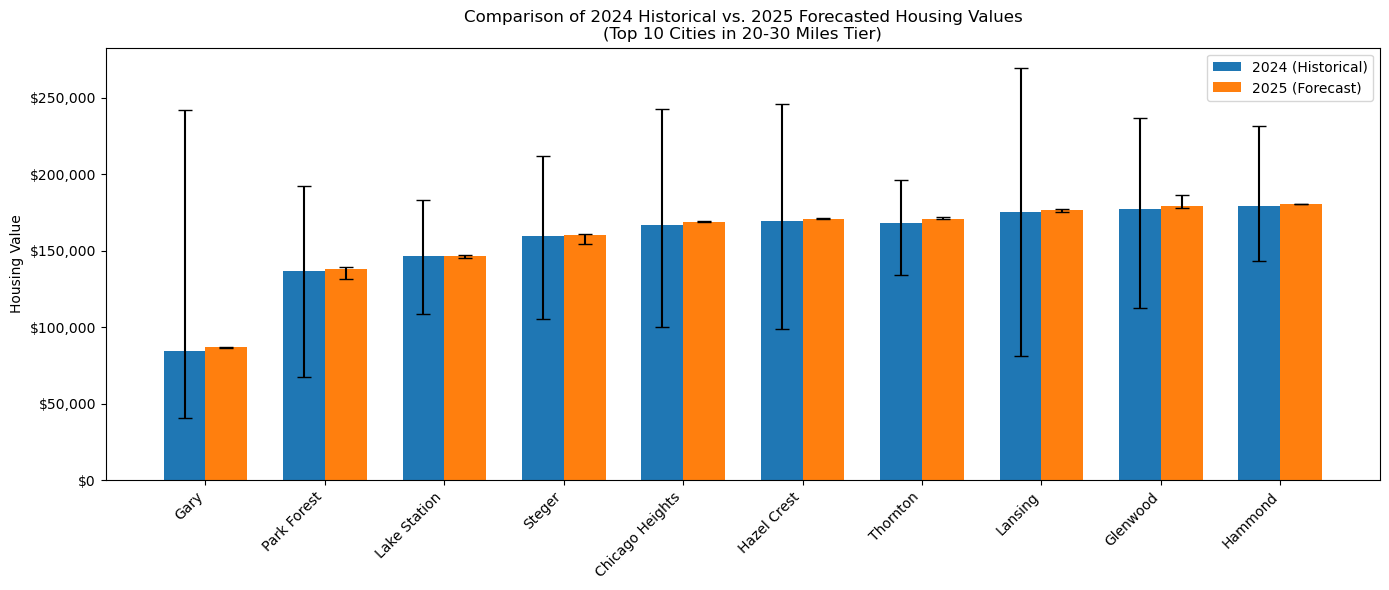

In [31]:
top10 = final_stats.sort_values('mean_2025', ascending=True).head(10)
cities_top = top10['city']
x = np.arange(len(cities_top))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 6))

# Calculate error bars for 2024
lower_err_2024 = (top10['mean_2024'] - top10['min_2024']).clip(lower=0)
upper_err_2024 = (top10['max_2024'] - top10['mean_2024']).clip(lower=0)
err_2024 = [lower_err_2024.values, upper_err_2024.values]

# Calculate error bars for 2025
lower_err_2025 = (top10['mean_2025'] - top10['min_2025']).clip(lower=0)
upper_err_2025 = (top10['max_2025'] - top10['mean_2025']).clip(lower=0)
err_2025 = [lower_err_2025.values, upper_err_2025.values]

# Plot 2024 bars
bars2024 = ax.bar(
    x - width/2, 
    top10['mean_2024'], 
    width, 
    yerr=err_2024, 
    capsize=5, 
    label='2024 (Historical)'
)

# Plot 2025 bars
bars2025 = ax.bar(
    x + width/2, 
    top10['mean_2025'], 
    width, 
    yerr=err_2025, 
    capsize=5, 
    label='2025 (Forecast)'
)

ax.set_xticks(x)
ax.set_xticklabels(cities_top, rotation=45, ha="right")
ax.set_ylabel("Housing Value")
ax.set_title(
    "Comparison of 2024 Historical vs. 2025 Forecasted Housing Values\n"
    "(Top 10 Cities in 20-30 Miles Tier)"
)
ax.legend()

# ---- NEW: Format y-axis in dollar notation ----
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.show()

In [61]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

st.title("Home Purchase Recommendation Dashboard")
st.write("""
This dashboard provides a recommendation based on forecasted housing prices for the 20–30 miles tier.
If you're a single mother with an income between **$60K–$100K** and a home-buying budget of **$220,000**, 
the dashboard below suggests locations where the forecasted 2025 average home price falls within your budget.
""")

st.sidebar.header("Your Details")
income_range = st.sidebar.slider(
    "Select your income range ($)", 
    min_value=60000, 
    max_value=100000, 
    value=(60000, 100000), 
    step=5000
)
budget = st.sidebar.number_input(
    "Enter your home-buying budget ($)", 
    value=220000, 
    step=10000
)
recommended = final_stats[final_stats['mean_2025'] <= budget].sort_values(by='mean_2025')
st.subheader("Recommended Locations (Forecasted 2025 Prices)")
if not recommended.empty:
    st.write(f"Based on your budget of ${budget:,.0f}, the following locations have forecasted average home prices below your budget:")
    st.dataframe(recommended[['city', 'mean_2025', 'min_2025', 'max_2025']])
else:
    st.write("No locations were found with forecasted average prices below your budget.")

selected_city = st.selectbox(
    "Select a city to see a detailed historical vs. forecast comparison", 
    final_stats["city"].unique()
)
city_data = final_stats[final_stats["city"] == selected_city].iloc[0]

In [62]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(["2024 (Historical)", "2025 (Forecast)"],
       [city_data["mean_2024"], city_data["mean_2025"]],
       color=["blue", "orange"])
ax.set_ylabel("Housing Price ($)")
ax.set_title(f"Average Housing Price Comparison for {selected_city}")
# Format y-axis with dollar formatting
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
st.pyplot(fig)

DeltaGenerator()

### NEW ONE 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

import matplotlib.dates as mdates
import datetime

df = pd.read_csv('/Users/heonkim/Desktop/capstone2 works /final_dataset.csv')

bins = list(range(0, 51, 10)) 
labels = [f"{bins[i]}-{bins[i+1]} miles" for i in range(len(bins)-1)]
df['distance_bin'] = pd.cut(
    df['distance_to_chicago_in_miles'],
    bins=bins, labels=labels, include_lowest=True
)

df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Filter for 20-30 miles tier
df_2030 = df[df['distance_bin'] == "20-30 miles"].copy()
df_2030['city'] = df_2030['city'].dropna().apply(lambda x: x.strip())
df_2030['date'] = pd.to_datetime(df_2030['date'], errors='coerce')

# Historical data for 2024
df_2024 = df_2030.loc[(df_2030['date'] >= '2024-01-01') & (df_2030['date'] <= '2024-12-31')].copy()
stats_2024 = (
    df_2024.groupby('city')['value']
    .agg(['mean', 'min', 'max'])
    .reset_index()
    .rename(columns={'mean': 'mean_2024', 'min': 'min_2024', 'max': 'max_2024'})
)


In [6]:
forecast_stats = []  # list to collect forecast stats per city
forecast_steps = 12

cities = df_2030['city'].unique()

for city in cities:
    # Filter historical data for the city (use all available data)
    city_data = df_2030[df_2030['city'] == city].copy()
    city_data = city_data.sort_values('date')
    
    # Use only the 'date' and 'value' columns and set date as index
    city_data.set_index('date', inplace=True)
    
    # If insufficient data, skip the city
    if len(city_data) < 10:
        print(f"Skipping {city}: not enough data.")
        continue

    # Fit ARIMA model (order can be tuned; here (1,1,1) is an example)
    try:
        model = ARIMA(city_data['value'], order=(1,1,1))
        model_fit = model.fit()
    except Exception as e:
        print(f"Error fitting model for {city}: {e}")
        continue

    # Forecast the next 12 months (for 2025)
    forecast_obj = model_fit.get_forecast(steps=forecast_steps)
    mean_forecast = forecast_obj.predicted_mean

    # Create forecast dates assuming monthly frequency.
    last_date = city_data.index[-1]
    future_dates = pd.date_range(start=last_date + pd.offsets.MonthEnd(1), periods=forecast_steps, freq='M')
    
    # Create a temporary DataFrame for this city's forecast
    city_forecast_df = pd.DataFrame({
        'date': future_dates,
        'value': mean_forecast.values
    })
    
    # Compute aggregated statistics for the forecasted 2025 values
    mean_2025 = city_forecast_df['value'].mean()
    min_2025 = city_forecast_df['value'].min()
    max_2025 = city_forecast_df['value'].max()
    
    forecast_stats.append({
        'city': city,
        'mean_2025': mean_2025,
        'min_2025': min_2025,
        'max_2025': max_2025
    })

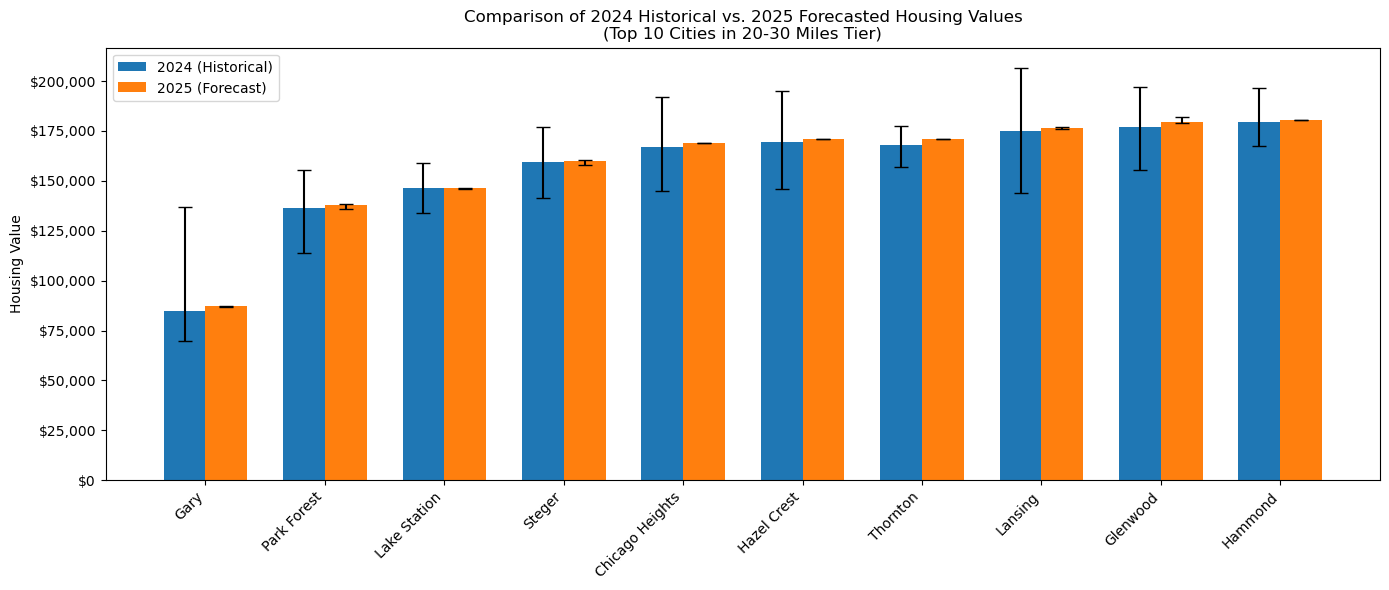

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# ... your existing data prep code here ...

# Let's say you have your final_stats DataFrame
top10 = final_stats.sort_values('mean_2025', ascending=True).head(10)
cities_top = top10['city']
x = np.arange(len(cities_top))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 6))

# -- Introduce a factor to narrow the error bars. Increase to make bars narrower. --
narrow_factor = 3

# Calculate error bars for 2024
lower_err_2024 = ((top10['mean_2024'] - top10['min_2024']) / narrow_factor).clip(lower=0)
upper_err_2024 = ((top10['max_2024'] - top10['mean_2024']) / narrow_factor).clip(lower=0)
err_2024 = [lower_err_2024.values, upper_err_2024.values]

# Calculate error bars for 2025
lower_err_2025 = ((top10['mean_2025'] - top10['min_2025']) / narrow_factor).clip(lower=0)
upper_err_2025 = ((top10['max_2025'] - top10['mean_2025']) / narrow_factor).clip(lower=0)
err_2025 = [lower_err_2025.values, upper_err_2025.values]

# Plot 2024 bars
bars2024 = ax.bar(
    x - width/2,
    top10['mean_2024'],
    width,
    yerr=err_2024,
    capsize=5,
    label='2024 (Historical)'
)

# Plot 2025 bars
bars2025 = ax.bar(
    x + width/2,
    top10['mean_2025'],
    width,
    yerr=err_2025,
    capsize=5,
    label='2025 (Forecast)'
)

ax.set_xticks(x)
ax.set_xticklabels(cities_top, rotation=45, ha="right")
ax.set_ylabel("Housing Value")
ax.set_title("Comparison of 2024 Historical vs. 2025 Forecasted Housing Values\n(Top 10 Cities in 20-30 Miles Tier)")
ax.legend()

# Format y-axis in dollar notation
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.show()


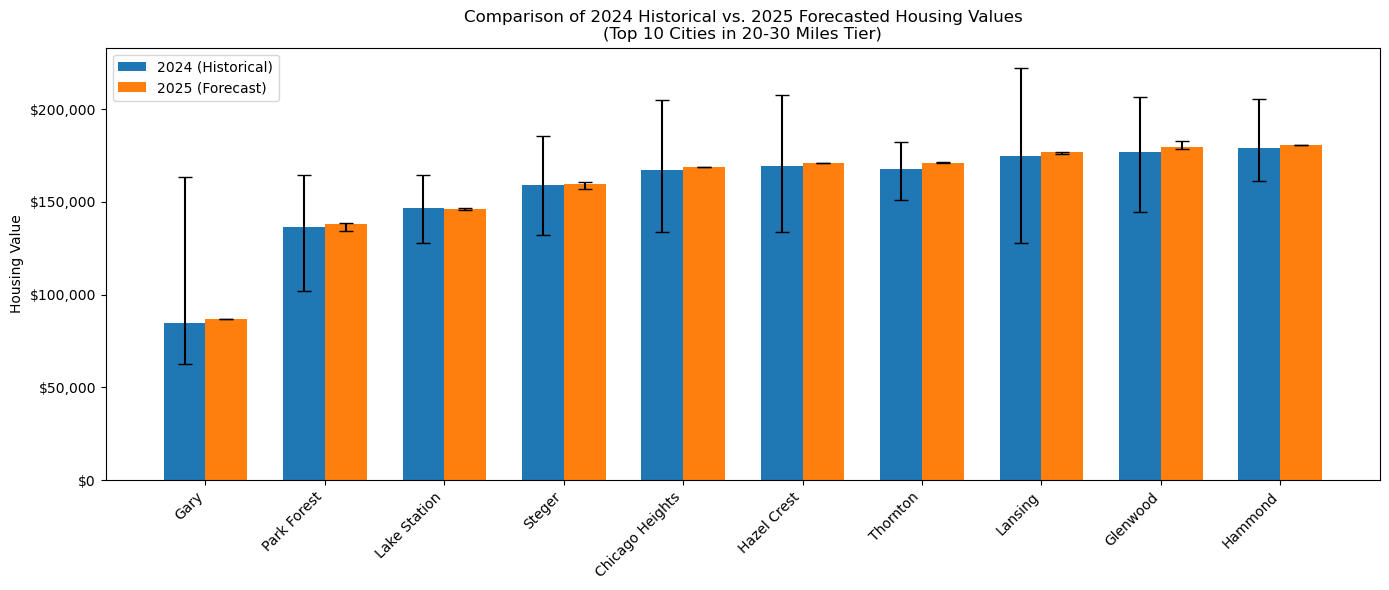

In [9]:
stats_2025 = pd.DataFrame(forecast_stats)
final_stats = pd.merge(stats_2024, stats_2025, on='city', how='inner')

top10 = final_stats.sort_values('mean_2025', ascending=True).head(10)
cities_top = top10['city']
x = np.arange(len(cities_top))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 6))

# Introduce a factor to narrow the error bars; adjust as needed.
narrow_factor = 2  # Increase this factor to narrow the error bars further

# Calculate error bars for 2024 using the narrow_factor
lower_err_2024 = ((top10['mean_2024'] - top10['min_2024']) / narrow_factor).clip(lower=0)
upper_err_2024 = ((top10['max_2024'] - top10['mean_2024']) / narrow_factor).clip(lower=0)
err_2024 = [lower_err_2024.values, upper_err_2024.values]

# Calculate error bars for 2025 using the narrow_factor
lower_err_2025 = ((top10['mean_2025'] - top10['min_2025']) / narrow_factor).clip(lower=0)
upper_err_2025 = ((top10['max_2025'] - top10['mean_2025']) / narrow_factor).clip(lower=0)
err_2025 = [lower_err_2025.values, upper_err_2025.values]

# Plot 2024 bars
bars2024 = ax.bar(
    x - width/2, 
    top10['mean_2024'], 
    width, 
    yerr=err_2024, 
    capsize=5, 
    label='2024 (Historical)'
)

# Plot 2025 bars
bars2025 = ax.bar(
    x + width/2, 
    top10['mean_2025'], 
    width, 
    yerr=err_2025, 
    capsize=5, 
    label='2025 (Forecast)'
)

ax.set_xticks(x)
ax.set_xticklabels(cities_top, rotation=45, ha="right")
ax.set_ylabel("Housing Value")
ax.set_title(
    "Comparison of 2024 Historical vs. 2025 Forecasted Housing Values\n"
    "(Top 10 Cities in 20-30 Miles Tier)"
)
ax.legend()

# Format y-axis in dollar notation
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.show()

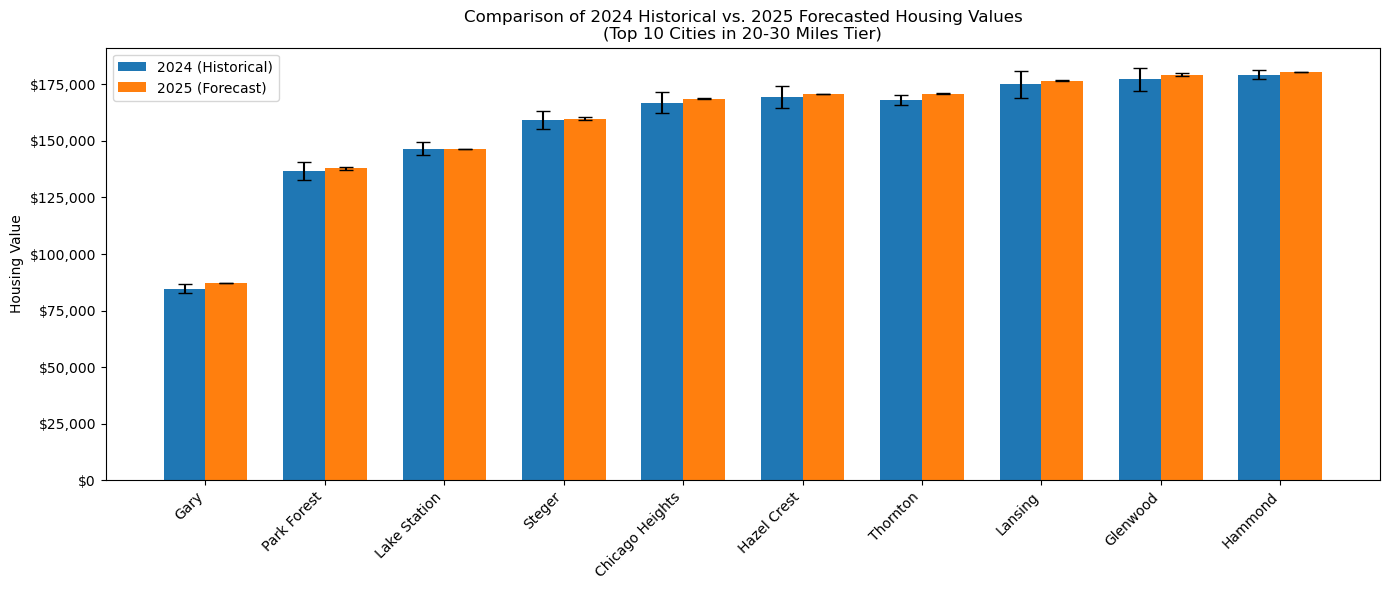

In [12]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# --- Data Preparation ---

# Filter for the "20-30 miles" tier and clean up the city names and dates.
df_2030 = df[df['distance_bin'] == "20-30 miles"].copy()
df_2030['city'] = df_2030['city'].dropna().apply(lambda x: x.strip())
df_2030['date'] = pd.to_datetime(df_2030['date'], errors='coerce')

# Filter for 2024 historical data
df_2024 = df_2030.loc[
    (df_2030['date'] >= '2024-01-01') & (df_2030['date'] <= '2024-12-31')
].copy()

# Compute historical statistics for 2024: mean, standard deviation, count, and SEM.
stats_2024 = (
    df_2024.groupby('city')['value']
    .agg(['mean', 'std', 'count'])
    .reset_index()
)
stats_2024['sem_2024'] = stats_2024['std'] / np.sqrt(stats_2024['count'])
stats_2024.rename(
    columns={'mean': 'mean_2024', 'std': 'std_2024', 'count': 'count_2024'},
    inplace=True
)

# --- Forecasting for 2025 using ARIMA ---

forecast_stats = []  # list to collect forecast stats per city
forecast_steps = 12  # forecast the next 12 months

cities = df_2030['city'].unique()

for city in cities:
    # Filter and sort the data for the city
    city_data = df_2030[df_2030['city'] == city].copy()
    city_data = city_data.sort_values('date')
    city_data.set_index('date', inplace=True)
    
    # Skip the city if there is insufficient data
    if len(city_data) < 10:
        print(f"Skipping {city}: not enough data.")
        continue
    
    # Fit an ARIMA model (order can be adjusted as needed)
    try:
        model = ARIMA(city_data['value'], order=(1, 1, 1))
        model_fit = model.fit()
    except Exception as e:
        print(f"Error fitting model for {city}: {e}")
        continue
    
    # Forecast the next 12 months (for 2025)
    forecast_obj = model_fit.get_forecast(steps=forecast_steps)
    mean_forecast = forecast_obj.predicted_mean
    
    # Create forecast dates assuming monthly frequency
    last_date = city_data.index[-1]
    future_dates = pd.date_range(start=last_date + pd.offsets.MonthEnd(1), periods=forecast_steps, freq='M')
    city_forecast_df = pd.DataFrame({
        'date': future_dates,
        'value': mean_forecast.values
    })
    
    # Compute forecast statistics: mean, standard deviation, count, and SEM for 2025
    mean_2025 = city_forecast_df['value'].mean()
    std_2025 = city_forecast_df['value'].std()
    count_2025 = len(city_forecast_df)
    sem_2025 = std_2025 / np.sqrt(count_2025)
    
    forecast_stats.append({
        'city': city,
        'mean_2025': mean_2025,
        'std_2025': std_2025,
        'count_2025': count_2025,
        'sem_2025': sem_2025
    })

stats_2025 = pd.DataFrame(forecast_stats)

# --- Merge the Historical and Forecast Stats ---

final_stats = pd.merge(
    stats_2024[['city', 'mean_2024', 'std_2024', 'sem_2024', 'count_2024']],
    stats_2025[['city', 'mean_2025', 'std_2025', 'sem_2025', 'count_2025']],
    on='city',
    how='inner'
)

# --- Plotting ---

# Select the top 10 cities based on 2025 forecasted mean (adjust sort order as needed)
top10 = final_stats.sort_values('mean_2025', ascending=True).head(10)
cities_top = top10['city']
x = np.arange(len(cities_top))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 6))

# Use Standard Error of the Mean (SEM) as error bars for a narrower visualization.
err_2024 = [top10['sem_2024'], top10['sem_2024']]
err_2025 = [top10['sem_2025'], top10['sem_2025']]

bars2024 = ax.bar(
    x - width/2,
    top10['mean_2024'],
    width,
    yerr=err_2024,
    capsize=5,
    label='2024 (Historical)'
)
bars2025 = ax.bar(
    x + width/2,
    top10['mean_2025'],
    width,
    yerr=err_2025,
    capsize=5,
    label='2025 (Forecast)'
)

ax.set_xticks(x)
ax.set_xticklabels(cities_top, rotation=45, ha="right")
ax.set_ylabel("Housing Value")
ax.set_title("Comparison of 2024 Historical vs. 2025 Forecasted Housing Values\n(Top 10 Cities in 20-30 Miles Tier)")
ax.legend()

# Format the y-axis with dollar notation.
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.show()


#### Forecasting plot 2: 0-10 miles range locations

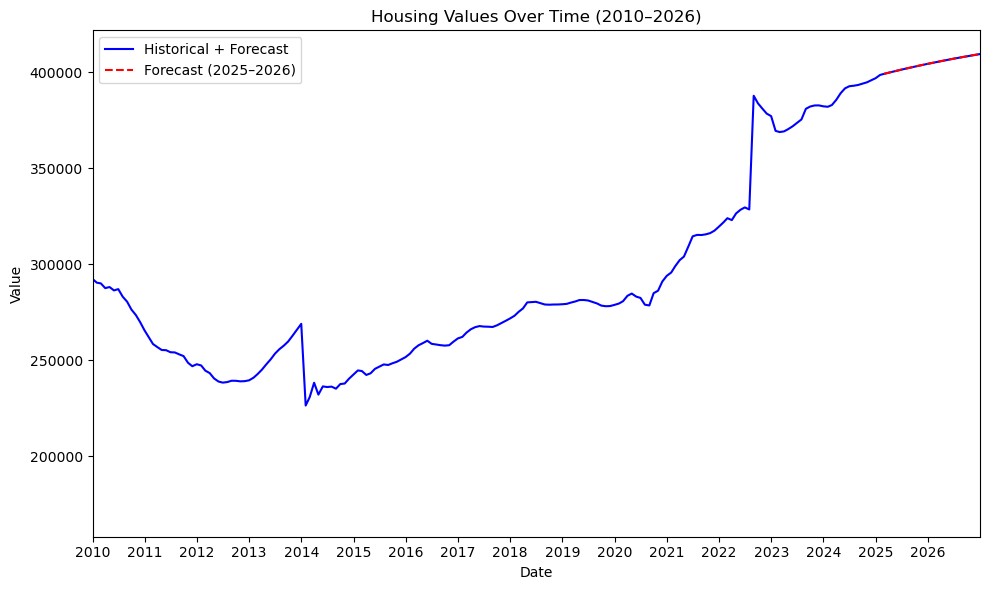

In [33]:
distance_bin = "0-10 miles"
df_bin = df[df['distance_bin'] == distance_bin].copy()

df_ts = df_bin.groupby('date')['value'].mean().reset_index()

df_ts['date'] = pd.to_datetime(df_ts['date'], errors='coerce')
df_ts.set_index('date', inplace=True)
df_ts.sort_index(inplace=True)

model = ARIMA(df_ts['value'], order=(1,1,1))
model_fit = model.fit()

steps = 24  # or however many periods you need
forecast_values = model_fit.forecast(steps=steps)

last_date = df_ts.index[-1]     
future_dates = pd.date_range(start=last_date + pd.offsets.MonthEnd(1), 
                             periods=steps, 
                             freq='M')

# Put forecast into a DataFrame
forecast_df = pd.DataFrame({'value': forecast_values.values}, index=future_dates)

combined_df = pd.concat([df_ts[['value']], forecast_df])

start = datetime.datetime(2010, 1, 1)
end   = datetime.datetime(2026, 12, 31)

plt.figure(figsize=(10, 6))

plt.plot(combined_df.index, combined_df['value'], label='Historical + Forecast', color='blue')

plt.plot(forecast_df.index, forecast_df['value'], label='Forecast (2025–2026)', color='red', linestyle='--')

# Configure the x-axis with yearly ticks
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())         
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # label format: YYYY

# Restrict x-axis to 2010–2026
ax.set_xlim([start, end])

plt.title('Housing Values Over Time (2010–2026)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()


In [34]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df_2030 = df[df['distance_bin'] == "0-10 miles"].copy()

df_2030['city'] = df_2030['city'].dropna().apply(lambda x: x.strip())

df_2030['date'] = pd.to_datetime(df_2030['date'], errors='coerce')

In [35]:
df_2024 = df_2030.loc[(df_2030['date'] >= '2024-01-01') & (df_2030['date'] <= '2024-12-31')].copy()
stats_2024 = (
    df_2024.groupby('city')['value']
    .agg(['mean', 'min', 'max'])
    .reset_index()
    .rename(columns={'mean': 'mean_2024', 'min': 'min_2024', 'max': 'max_2024'})
)

In [36]:
forecast_stats = []  # list to collect forecast stats per city
forecast_steps = 12

cities = df_2030['city'].unique()

for city in cities:
    # Filter historical data for the city (use all available data)
    city_data = df_2030[df_2030['city'] == city].copy()
    city_data = city_data.sort_values('date')
    
    # Use only the 'date' and 'value' columns and set date as index
    city_data.set_index('date', inplace=True)
    
    # If insufficient data, skip the city
    if len(city_data) < 10:
        print(f"Skipping {city}: not enough data.")
        continue

    # Fit ARIMA model (order can be tuned; here (1,1,1) is an example)
    try:
        model = ARIMA(city_data['value'], order=(1,1,1))
        model_fit = model.fit()
    except Exception as e:
        print(f"Error fitting model for {city}: {e}")
        continue

    # Forecast the next 12 months (for 2025)
    forecast_obj = model_fit.get_forecast(steps=forecast_steps)
    mean_forecast = forecast_obj.predicted_mean

    # Create forecast dates assuming monthly frequency.
    last_date = city_data.index[-1]
    future_dates = pd.date_range(start=last_date + pd.offsets.MonthEnd(1), periods=forecast_steps, freq='M')
    
    # Create a temporary DataFrame for this city's forecast
    city_forecast_df = pd.DataFrame({
        'date': future_dates,
        'value': mean_forecast.values
    })
    
    # Compute aggregated statistics for the forecasted 2025 values
    mean_2025 = city_forecast_df['value'].mean()
    min_2025 = city_forecast_df['value'].min()
    max_2025 = city_forecast_df['value'].max()
    
    forecast_stats.append({
        'city': city,
        'mean_2025': mean_2025,
        'min_2025': min_2025,
        'max_2025': max_2025
    })


In [37]:
stats_2025 = pd.DataFrame(forecast_stats)
final_stats = pd.merge(stats_2024, stats_2025, on='city', how='inner')
final_stats

,city,mean_2024,min_2024,max_2024,mean_2025,min_2025,max_2025
0,Berwyn,257479.508595,123495.845148,3.802405e+05,258840.097224,252717.387682,259941.775824
1,Chicago,399917.236370,71304.619510,2.503329e+06,403557.460427,403507.767821,404071.280542
2,Cicero,238098.169070,157230.914863,3.105768e+05,241957.278451,241461.705614,242045.912225
3,Elmwood Park,291506.462856,127722.702833,4.248311e+05,292253.855007,287254.616510,293269.919967
4,Forest Park,262444.108943,132038.346645,4.179185e+05,260530.822323,250961.415836,262021.596214
5,Oak Park,381830.096523,143351.177765,9.135367e+05,382468.775225,382036.536826,386007.374459
6,River Forest,567458.370793,132256.522638,1.143378e+06,566372.101844,557313.146826,607058.205646


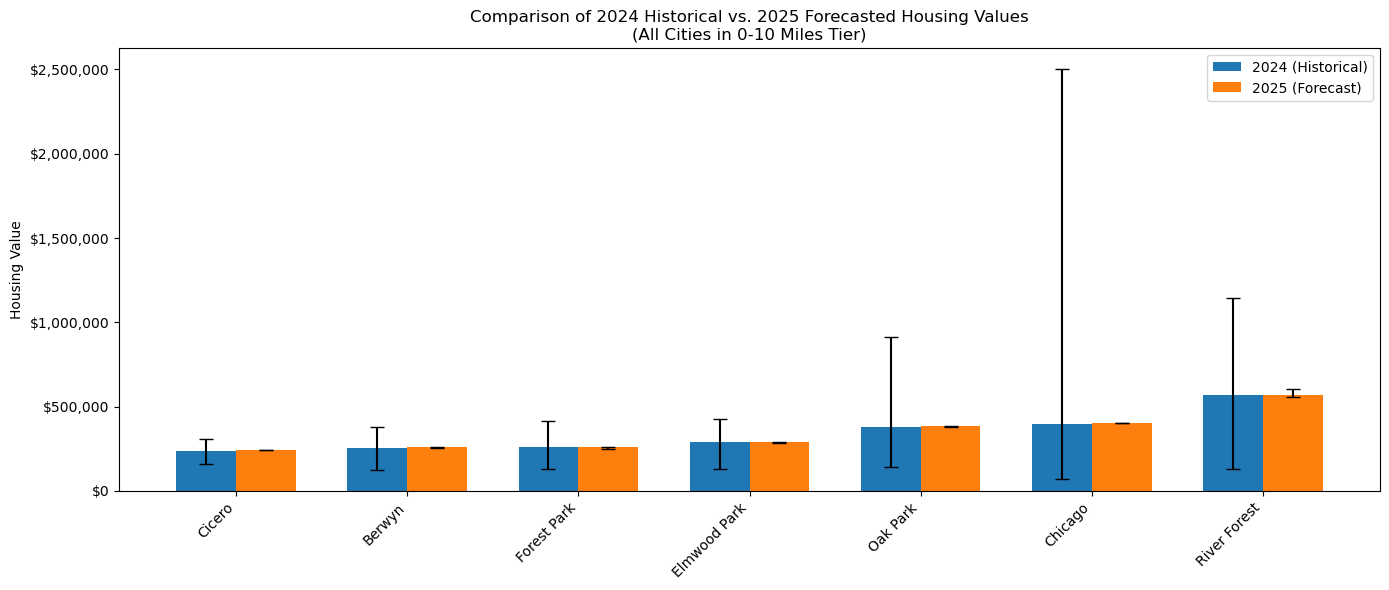

In [38]:
top10 = final_stats.sort_values('mean_2025', ascending=True).head(10)
cities_top = top10['city']
x = np.arange(len(cities_top))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 6))

# Calculate error bars for 2024
lower_err_2024 = (top10['mean_2024'] - top10['min_2024']).clip(lower=0)
upper_err_2024 = (top10['max_2024'] - top10['mean_2024']).clip(lower=0)
err_2024 = [lower_err_2024.values, upper_err_2024.values]

# Calculate error bars for 2025
lower_err_2025 = (top10['mean_2025'] - top10['min_2025']).clip(lower=0)
upper_err_2025 = (top10['max_2025'] - top10['mean_2025']).clip(lower=0)
err_2025 = [lower_err_2025.values, upper_err_2025.values]

# Plot 2024 bars
bars2024 = ax.bar(
    x - width/2, 
    top10['mean_2024'], 
    width, 
    yerr=err_2024, 
    capsize=5, 
    label='2024 (Historical)'
)

# Plot 2025 bars
bars2025 = ax.bar(
    x + width/2, 
    top10['mean_2025'], 
    width, 
    yerr=err_2025, 
    capsize=5, 
    label='2025 (Forecast)'
)

ax.set_xticks(x)
ax.set_xticklabels(cities_top, rotation=45, ha="right")
ax.set_ylabel("Housing Value")
ax.set_title(
    "Comparison of 2024 Historical vs. 2025 Forecasted Housing Values\n"
    "(All Cities in 0-10 Miles Tier)"
)
ax.legend()

# ---- NEW: Format y-axis in dollar notation ----
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.show()

#### Forecasting plot 3 : 10-20 miles range locations

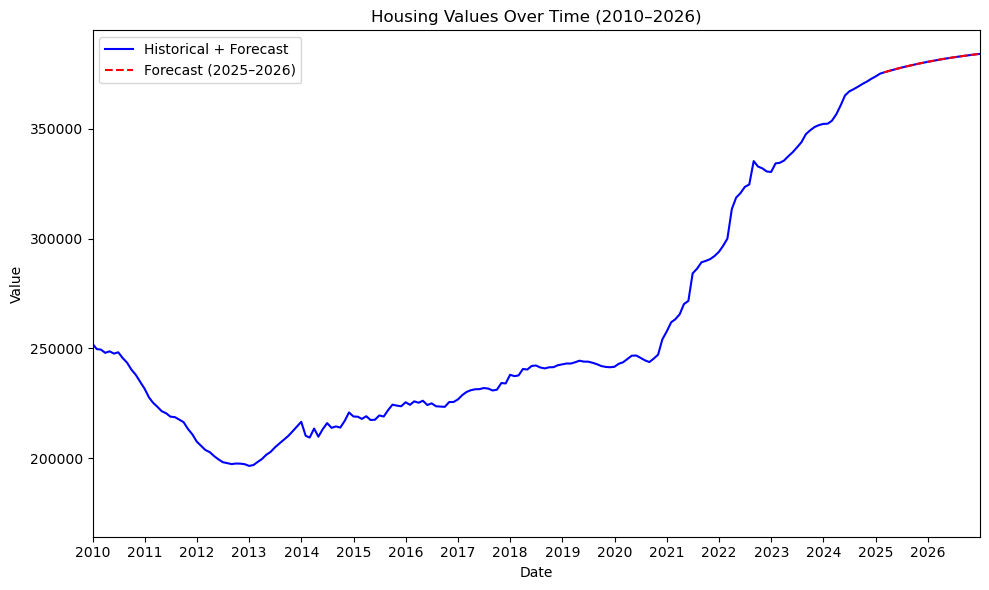

In [39]:
distance_bin = "10-20 miles"
df_bin = df[df['distance_bin'] == distance_bin].copy()

df_ts = df_bin.groupby('date')['value'].mean().reset_index()

df_ts['date'] = pd.to_datetime(df_ts['date'], errors='coerce')
df_ts.set_index('date', inplace=True)
df_ts.sort_index(inplace=True)

model = ARIMA(df_ts['value'], order=(1,1,1))
model_fit = model.fit()

steps = 24  # or however many periods you need
forecast_values = model_fit.forecast(steps=steps)

last_date = df_ts.index[-1]     
future_dates = pd.date_range(start=last_date + pd.offsets.MonthEnd(1), 
                             periods=steps, 
                             freq='M')

# Put forecast into a DataFrame
forecast_df = pd.DataFrame({'value': forecast_values.values}, index=future_dates)

combined_df = pd.concat([df_ts[['value']], forecast_df])

start = datetime.datetime(2010, 1, 1)
end   = datetime.datetime(2026, 12, 31)

plt.figure(figsize=(10, 6))

plt.plot(combined_df.index, combined_df['value'], label='Historical + Forecast', color='blue')

plt.plot(forecast_df.index, forecast_df['value'], label='Forecast (2025–2026)', color='red', linestyle='--')

# Configure the x-axis with yearly ticks
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())         
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # label format: YYYY

# Restrict x-axis to 2010–2026
ax.set_xlim([start, end])

plt.title('Housing Values Over Time (2010–2026)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()


In [40]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df_2030 = df[df['distance_bin'] == "10-20 miles"].copy()

df_2030['city'] = df_2030['city'].dropna().apply(lambda x: x.strip())

df_2030['date'] = pd.to_datetime(df_2030['date'], errors='coerce')

In [41]:
df_2024 = df_2030.loc[(df_2030['date'] >= '2024-01-01') & (df_2030['date'] <= '2024-12-31')].copy()
stats_2024 = (
    df_2024.groupby('city')['value']
    .agg(['mean', 'min', 'max'])
    .reset_index()
    .rename(columns={'mean': 'mean_2024', 'min': 'min_2024', 'max': 'max_2024'})
)

In [42]:
forecast_stats = []  # list to collect forecast stats per city
forecast_steps = 12

cities = df_2030['city'].unique()

for city in cities:
    # Filter historical data for the city (use all available data)
    city_data = df_2030[df_2030['city'] == city].copy()
    city_data = city_data.sort_values('date')
    
    # Use only the 'date' and 'value' columns and set date as index
    city_data.set_index('date', inplace=True)
    
    # If insufficient data, skip the city
    if len(city_data) < 10:
        print(f"Skipping {city}: not enough data.")
        continue

    # Fit ARIMA model (order can be tuned; here (1,1,1) is an example)
    try:
        model = ARIMA(city_data['value'], order=(1,1,1))
        model_fit = model.fit()
    except Exception as e:
        print(f"Error fitting model for {city}: {e}")
        continue

    # Forecast the next 12 months (for 2025)
    forecast_obj = model_fit.get_forecast(steps=forecast_steps)
    mean_forecast = forecast_obj.predicted_mean

    # Create forecast dates assuming monthly frequency.
    last_date = city_data.index[-1]
    future_dates = pd.date_range(start=last_date + pd.offsets.MonthEnd(1), periods=forecast_steps, freq='M')
    
    # Create a temporary DataFrame for this city's forecast
    city_forecast_df = pd.DataFrame({
        'date': future_dates,
        'value': mean_forecast.values
    })
    
    # Compute aggregated statistics for the forecasted 2025 values
    mean_2025 = city_forecast_df['value'].mean()
    min_2025 = city_forecast_df['value'].min()
    max_2025 = city_forecast_df['value'].max()
    
    forecast_stats.append({
        'city': city,
        'mean_2025': mean_2025,
        'min_2025': min_2025,
        'max_2025': max_2025
    })


In [43]:
stats_2025 = pd.DataFrame(forecast_stats)
final_stats = pd.merge(stats_2024, stats_2025, on='city', how='inner')
final_stats

,city,mean_2024,min_2024,max_2024,mean_2025,min_2025,max_2025
0,Addison,333375.953364,138766.637985,5.824710e+05,334321.338599,332409.542285,3.346690e+05
1,Alsip,237743.694371,141302.220421,3.243037e+05,237189.293823,235371.233205,2.375304e+05
2,Bellwood,222816.556764,135645.308067,2.939799e+05,227701.305672,225965.634339,2.362925e+05
3,Bensenville,296758.982165,142740.846296,4.530095e+05,301762.185840,297286.599488,3.199019e+05
4,Berkeley,271356.654543,228029.071133,3.157063e+05,275166.062607,275156.435413,2.752079e+05
...,...,...,...,...,...,...,...
68,Willowbrook,497677.278761,137499.394046,1.125990e+06,491931.645026,485801.858475,5.202714e+05
69,Wilmette,741716.343515,246089.438450,1.595346e+06,738960.471538,724221.278162,7.416850e+05
70,Winnetka,966626.977771,234684.118908,2.092946e+06,965701.200676,955798.959124,1.016129e+06
71,Wood Dale,355723.585723,239383.738901,5.560023e+05,359366.016085,359003.920798,3.610460e+05


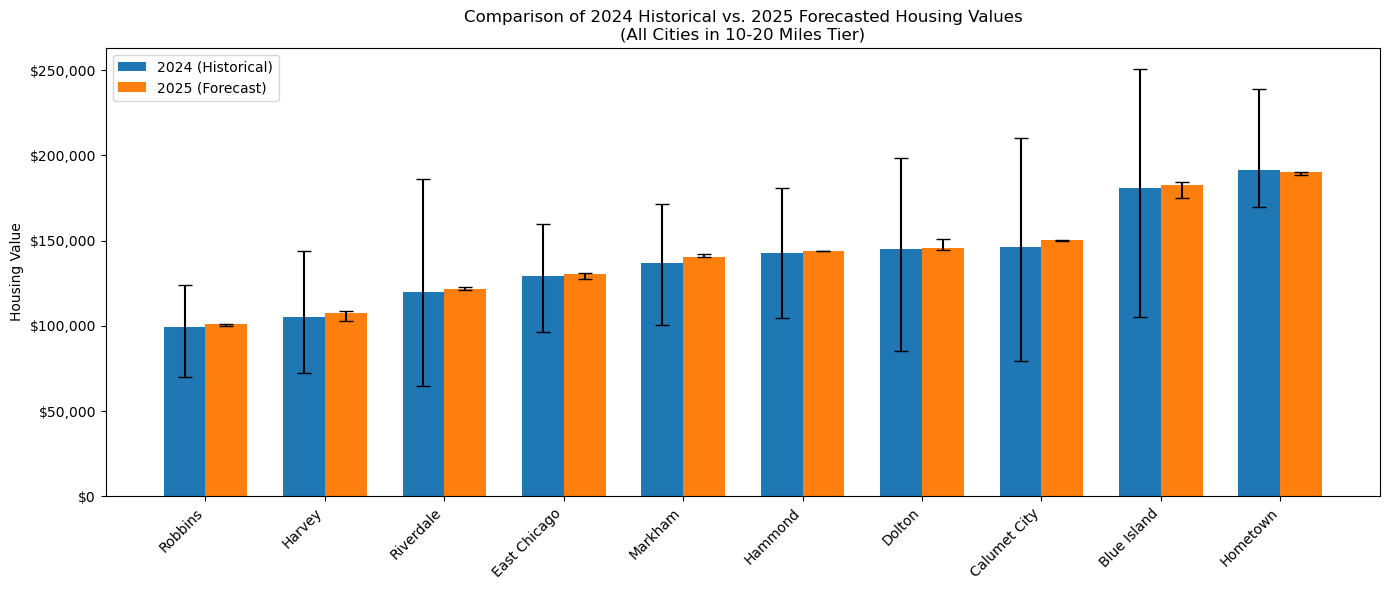

In [44]:
top10 = final_stats.sort_values('mean_2025', ascending=True).head(10)
cities_top = top10['city']
x = np.arange(len(cities_top))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 6))

# Calculate error bars for 2024
lower_err_2024 = (top10['mean_2024'] - top10['min_2024']).clip(lower=0)
upper_err_2024 = (top10['max_2024'] - top10['mean_2024']).clip(lower=0)
err_2024 = [lower_err_2024.values, upper_err_2024.values]

# Calculate error bars for 2025
lower_err_2025 = (top10['mean_2025'] - top10['min_2025']).clip(lower=0)
upper_err_2025 = (top10['max_2025'] - top10['mean_2025']).clip(lower=0)
err_2025 = [lower_err_2025.values, upper_err_2025.values]

# Plot 2024 bars
bars2024 = ax.bar(
    x - width/2, 
    top10['mean_2024'], 
    width, 
    yerr=err_2024, 
    capsize=5, 
    label='2024 (Historical)'
)

# Plot 2025 bars
bars2025 = ax.bar(
    x + width/2, 
    top10['mean_2025'], 
    width, 
    yerr=err_2025, 
    capsize=5, 
    label='2025 (Forecast)'
)

ax.set_xticks(x)
ax.set_xticklabels(cities_top, rotation=45, ha="right")
ax.set_ylabel("Housing Value")
ax.set_title(
    "Comparison of 2024 Historical vs. 2025 Forecasted Housing Values\n"
    "(All Cities in 10-20 Miles Tier)"
)
ax.legend()

# ---- NEW: Format y-axis in dollar notation ----
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.show()

#### Forecasting plot 4 : 30-40 miles range locations

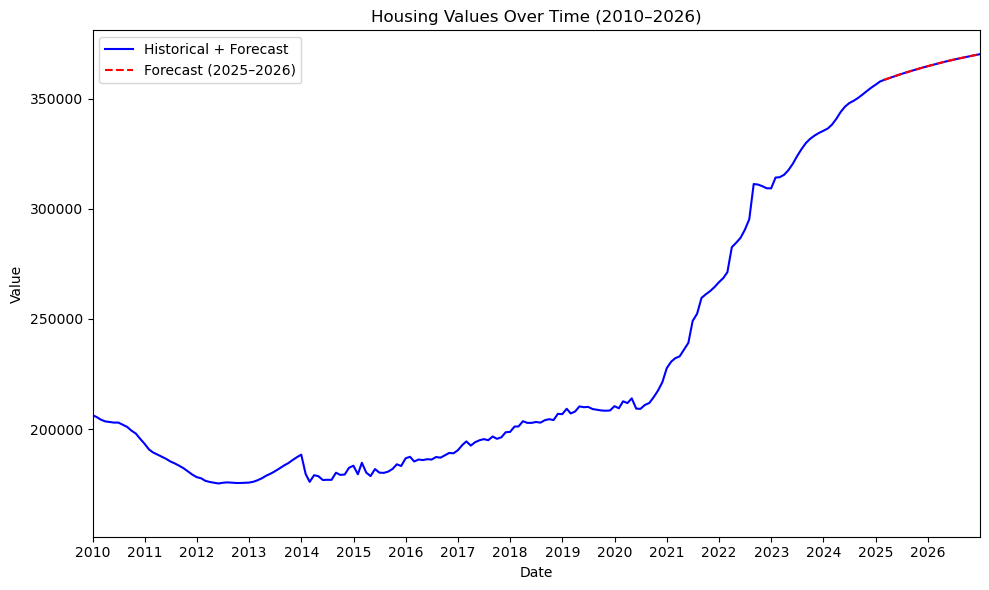

In [45]:
distance_bin = "30-40 miles"
df_bin = df[df['distance_bin'] == distance_bin].copy()

df_ts = df_bin.groupby('date')['value'].mean().reset_index()

df_ts['date'] = pd.to_datetime(df_ts['date'], errors='coerce')
df_ts.set_index('date', inplace=True)
df_ts.sort_index(inplace=True)

model = ARIMA(df_ts['value'], order=(1,1,1))
model_fit = model.fit()

steps = 24  # or however many periods you need
forecast_values = model_fit.forecast(steps=steps)

last_date = df_ts.index[-1]     
future_dates = pd.date_range(start=last_date + pd.offsets.MonthEnd(1), 
                             periods=steps, 
                             freq='M')

# Put forecast into a DataFrame
forecast_df = pd.DataFrame({'value': forecast_values.values}, index=future_dates)

combined_df = pd.concat([df_ts[['value']], forecast_df])

start = datetime.datetime(2010, 1, 1)
end   = datetime.datetime(2026, 12, 31)

plt.figure(figsize=(10, 6))

plt.plot(combined_df.index, combined_df['value'], label='Historical + Forecast', color='blue')

plt.plot(forecast_df.index, forecast_df['value'], label='Forecast (2025–2026)', color='red', linestyle='--')

# Configure the x-axis with yearly ticks
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())         
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # label format: YYYY

# Restrict x-axis to 2010–2026
ax.set_xlim([start, end])

plt.title('Housing Values Over Time (2010–2026)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()


In [46]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df_2030 = df[df['distance_bin'] == "30-40 miles"].copy()

df_2030['city'] = df_2030['city'].dropna().apply(lambda x: x.strip())

df_2030['date'] = pd.to_datetime(df_2030['date'], errors='coerce')

In [47]:
df_2024 = df_2030.loc[(df_2030['date'] >= '2024-01-01') & (df_2030['date'] <= '2024-12-31')].copy()
stats_2024 = (
    df_2024.groupby('city')['value']
    .agg(['mean', 'min', 'max'])
    .reset_index()
    .rename(columns={'mean': 'mean_2024', 'min': 'min_2024', 'max': 'max_2024'})
)

In [48]:
forecast_stats = []  # list to collect forecast stats per city
forecast_steps = 12

cities = df_2030['city'].unique()

for city in cities:
    # Filter historical data for the city (use all available data)
    city_data = df_2030[df_2030['city'] == city].copy()
    city_data = city_data.sort_values('date')
    
    # Use only the 'date' and 'value' columns and set date as index
    city_data.set_index('date', inplace=True)
    
    # If insufficient data, skip the city
    if len(city_data) < 10:
        print(f"Skipping {city}: not enough data.")
        continue

    # Fit ARIMA model (order can be tuned; here (1,1,1) is an example)
    try:
        model = ARIMA(city_data['value'], order=(1,1,1))
        model_fit = model.fit()
    except Exception as e:
        print(f"Error fitting model for {city}: {e}")
        continue

    # Forecast the next 12 months (for 2025)
    forecast_obj = model_fit.get_forecast(steps=forecast_steps)
    mean_forecast = forecast_obj.predicted_mean

    # Create forecast dates assuming monthly frequency.
    last_date = city_data.index[-1]
    future_dates = pd.date_range(start=last_date + pd.offsets.MonthEnd(1), periods=forecast_steps, freq='M')
    
    # Create a temporary DataFrame for this city's forecast
    city_forecast_df = pd.DataFrame({
        'date': future_dates,
        'value': mean_forecast.values
    })
    
    # Compute aggregated statistics for the forecasted 2025 values
    mean_2025 = city_forecast_df['value'].mean()
    min_2025 = city_forecast_df['value'].min()
    max_2025 = city_forecast_df['value'].max()
    
    forecast_stats.append({
        'city': city,
        'mean_2025': mean_2025,
        'min_2025': min_2025,
        'max_2025': max_2025
    })


Skipping nan: not enough data.


In [49]:
stats_2025 = pd.DataFrame(forecast_stats)
final_stats = pd.merge(stats_2024, stats_2025, on='city', how='inner')
final_stats

,city,mean_2024,min_2024,max_2024,mean_2025,min_2025,max_2025
0,Aurora,317312.288725,119523.276609,6.911831e+05,320911.190278,320322.825626,320973.012312
1,Barrington,590256.130317,311087.423514,1.023596e+06,588008.417934,584660.225741,606609.231567
2,Bartlett,388894.671060,249451.432780,5.623868e+05,389155.912970,388937.780014,390374.957727
3,Batavia,397062.180039,269607.364901,6.001835e+05,398137.908117,396772.647092,398397.935544
4,Beecher,285911.249459,213678.325353,3.531571e+05,290031.315373,287440.365821,300183.870106
5,Campton Hills,503494.846896,307644.617153,7.703248e+05,505520.849480,502890.948367,516147.060784
6,Carpentersville,265157.972199,160777.824543,3.995128e+05,270141.706035,268632.586758,276671.272679
7,Cary,343154.194543,233259.236519,5.182360e+05,345677.848100,345520.947850,345709.942715
8,Cedar Lake,305835.105172,120159.542369,4.492215e+05,307096.799000,306096.970115,312697.459281
9,Chesterton,306805.508139,203440.217064,4.618645e+05,307180.124375,306883.698954,308603.306046


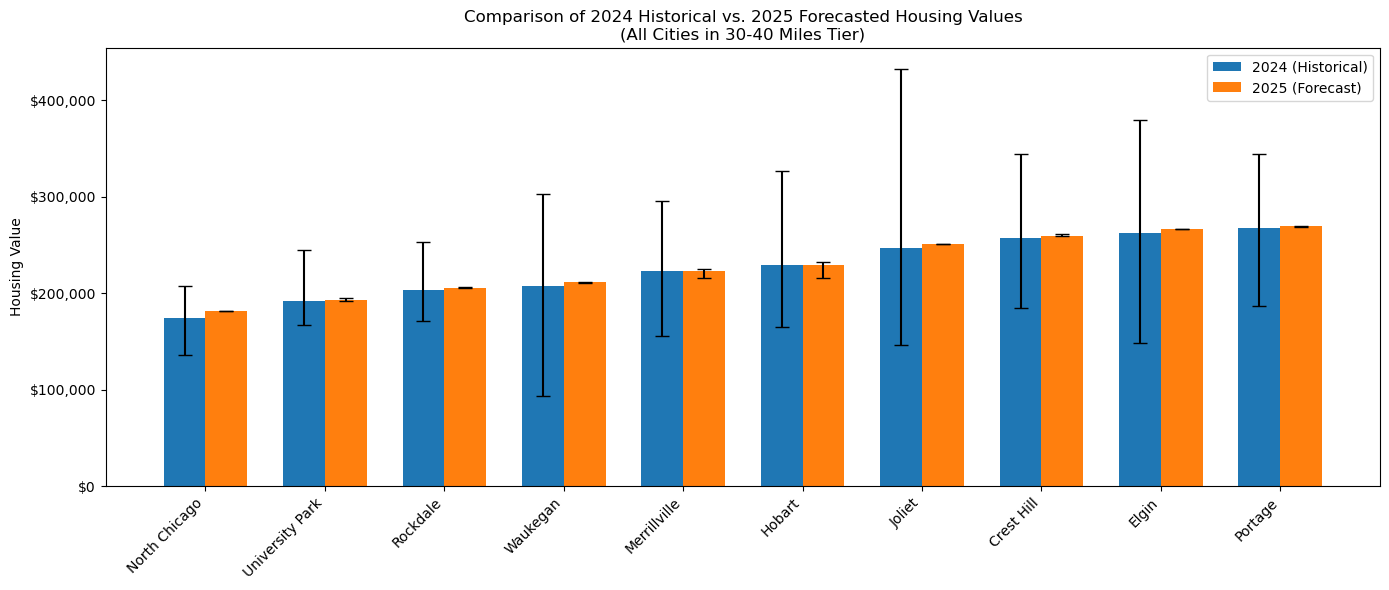

In [50]:
top10 = final_stats.sort_values('mean_2025', ascending=True).head(10)
cities_top = top10['city']
x = np.arange(len(cities_top))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 6))

# Calculate error bars for 2024
lower_err_2024 = (top10['mean_2024'] - top10['min_2024']).clip(lower=0)
upper_err_2024 = (top10['max_2024'] - top10['mean_2024']).clip(lower=0)
err_2024 = [lower_err_2024.values, upper_err_2024.values]

# Calculate error bars for 2025
lower_err_2025 = (top10['mean_2025'] - top10['min_2025']).clip(lower=0)
upper_err_2025 = (top10['max_2025'] - top10['mean_2025']).clip(lower=0)
err_2025 = [lower_err_2025.values, upper_err_2025.values]

# Plot 2024 bars
bars2024 = ax.bar(
    x - width/2, 
    top10['mean_2024'], 
    width, 
    yerr=err_2024, 
    capsize=5, 
    label='2024 (Historical)'
)

# Plot 2025 bars
bars2025 = ax.bar(
    x + width/2, 
    top10['mean_2025'], 
    width, 
    yerr=err_2025, 
    capsize=5, 
    label='2025 (Forecast)'
)

ax.set_xticks(x)
ax.set_xticklabels(cities_top, rotation=45, ha="right")
ax.set_ylabel("Housing Value")
ax.set_title(
    "Comparison of 2024 Historical vs. 2025 Forecasted Housing Values\n"
    "(All Cities in 30-40 Miles Tier)"
)
ax.legend()

# ---- NEW: Format y-axis in dollar notation ----
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.show()

#### Forecasting plot 4 : 40-50 miles range locations

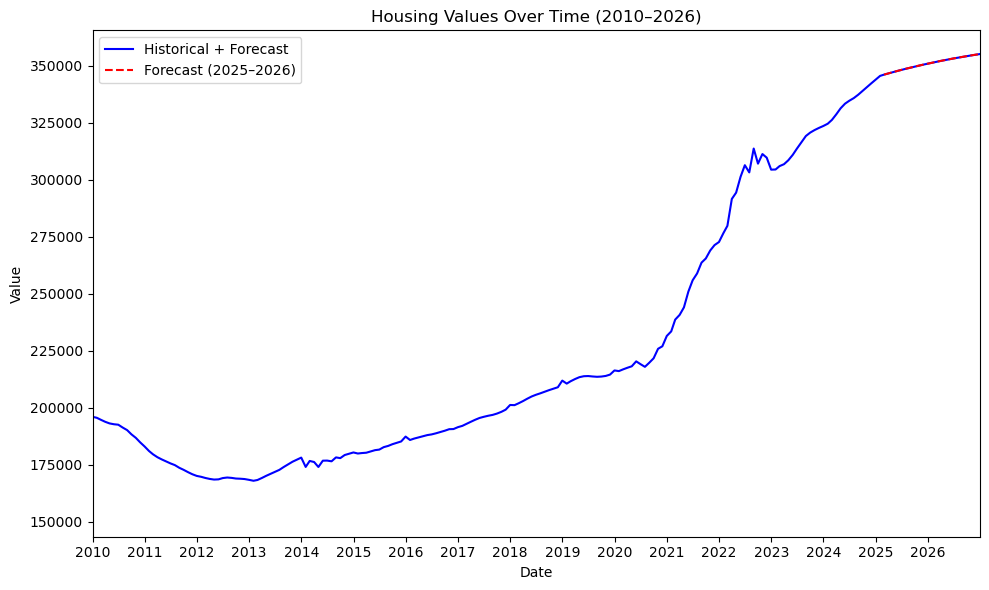

In [51]:
distance_bin = "40-50 miles"
df_bin = df[df['distance_bin'] == distance_bin].copy()

df_ts = df_bin.groupby('date')['value'].mean().reset_index()

df_ts['date'] = pd.to_datetime(df_ts['date'], errors='coerce')
df_ts.set_index('date', inplace=True)
df_ts.sort_index(inplace=True)

model = ARIMA(df_ts['value'], order=(1,1,1))
model_fit = model.fit()

steps = 24  # or however many periods you need
forecast_values = model_fit.forecast(steps=steps)

last_date = df_ts.index[-1]     
future_dates = pd.date_range(start=last_date + pd.offsets.MonthEnd(1), 
                             periods=steps, 
                             freq='M')

# Put forecast into a DataFrame
forecast_df = pd.DataFrame({'value': forecast_values.values}, index=future_dates)

combined_df = pd.concat([df_ts[['value']], forecast_df])

start = datetime.datetime(2010, 1, 1)
end   = datetime.datetime(2026, 12, 31)

plt.figure(figsize=(10, 6))

plt.plot(combined_df.index, combined_df['value'], label='Historical + Forecast', color='blue')

plt.plot(forecast_df.index, forecast_df['value'], label='Forecast (2025–2026)', color='red', linestyle='--')

# Configure the x-axis with yearly ticks
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())         
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # label format: YYYY

# Restrict x-axis to 2010–2026
ax.set_xlim([start, end])

plt.title('Housing Values Over Time (2010–2026)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()


In [55]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df_2030 = df[df['distance_bin'] == "40-50 miles"].copy()

df_2030['city'] = df_2030['city'].dropna().apply(lambda x: x.strip())

df_2030['date'] = pd.to_datetime(df_2030['date'], errors='coerce')

In [56]:
df_2024 = df_2030.loc[(df_2030['date'] >= '2024-01-01') & (df_2030['date'] <= '2024-12-31')].copy()
stats_2024 = (
    df_2024.groupby('city')['value']
    .agg(['mean', 'min', 'max'])
    .reset_index()
    .rename(columns={'mean': 'mean_2024', 'min': 'min_2024', 'max': 'max_2024'})
)

In [57]:
forecast_stats = []  # list to collect forecast stats per city
forecast_steps = 12

cities = df_2030['city'].unique()

for city in cities:
    # Filter historical data for the city (use all available data)
    city_data = df_2030[df_2030['city'] == city].copy()
    city_data = city_data.sort_values('date')
    
    # Use only the 'date' and 'value' columns and set date as index
    city_data.set_index('date', inplace=True)
    
    # If insufficient data, skip the city
    if len(city_data) < 10:
        print(f"Skipping {city}: not enough data.")
        continue

    # Fit ARIMA model (order can be tuned; here (1,1,1) is an example)
    try:
        model = ARIMA(city_data['value'], order=(1,1,1))
        model_fit = model.fit()
    except Exception as e:
        print(f"Error fitting model for {city}: {e}")
        continue

    # Forecast the next 12 months (for 2025)
    forecast_obj = model_fit.get_forecast(steps=forecast_steps)
    mean_forecast = forecast_obj.predicted_mean

    # Create forecast dates assuming monthly frequency.
    last_date = city_data.index[-1]
    future_dates = pd.date_range(start=last_date + pd.offsets.MonthEnd(1), periods=forecast_steps, freq='M')
    
    # Create a temporary DataFrame for this city's forecast
    city_forecast_df = pd.DataFrame({
        'date': future_dates,
        'value': mean_forecast.values
    })
    
    # Compute aggregated statistics for the forecasted 2025 values
    mean_2025 = city_forecast_df['value'].mean()
    min_2025 = city_forecast_df['value'].min()
    max_2025 = city_forecast_df['value'].max()
    
    forecast_stats.append({
        'city': city,
        'mean_2025': mean_2025,
        'min_2025': min_2025,
        'max_2025': max_2025
    })


Skipping nan: not enough data.


In [58]:
stats_2025 = pd.DataFrame(forecast_stats)
final_stats = pd.merge(stats_2024, stats_2025, on='city', how='inner')
final_stats

,city,mean_2024,min_2024,max_2024,mean_2025,min_2025,max_2025
0,Algonquin,362427.704655,243169.517022,5.231549e+05,364174.618551,353859.606553,365829.329148
1,Antioch,302951.547719,196228.001475,4.390097e+05,304485.914471,295032.923376,306476.958683
2,Big Rock,351251.893622,330224.665605,3.666055e+05,352871.592580,352867.082167,352888.162617
3,Bourbonnais,269939.865292,193045.947212,3.749026e+05,271746.946423,258565.409571,274744.375740
4,Bristol,383986.956658,303987.775394,5.179593e+05,381001.273580,380388.344285,383445.185949
5,Burlington,274736.080511,262909.424298,2.840966e+05,272973.301486,271352.351641,273337.441234
6,Channahon,348945.887298,255400.307237,4.165108e+05,352352.236503,345443.919590,353770.792587
7,Crystal Lake,352374.791060,140606.429682,5.570175e+05,355720.017669,354582.247696,362763.844457
8,Elburn,408170.303830,255541.148958,5.404103e+05,411365.806050,392616.180549,415993.262875
9,Elgin,430057.835188,281413.724839,5.810944e+05,435579.105236,432544.696685,450253.576637


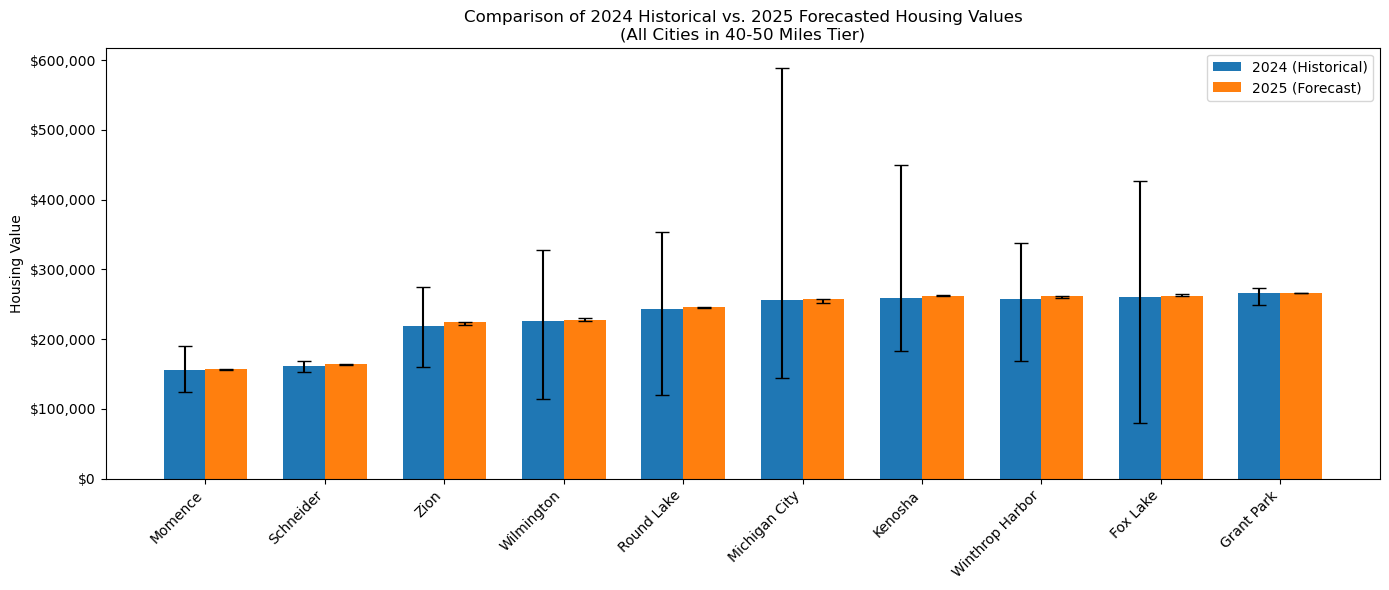

In [59]:
top10 = final_stats.sort_values('mean_2025', ascending=True).head(10)
cities_top = top10['city']
x = np.arange(len(cities_top))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 6))

# Calculate error bars for 2024
lower_err_2024 = (top10['mean_2024'] - top10['min_2024']).clip(lower=0)
upper_err_2024 = (top10['max_2024'] - top10['mean_2024']).clip(lower=0)
err_2024 = [lower_err_2024.values, upper_err_2024.values]

# Calculate error bars for 2025
lower_err_2025 = (top10['mean_2025'] - top10['min_2025']).clip(lower=0)
upper_err_2025 = (top10['max_2025'] - top10['mean_2025']).clip(lower=0)
err_2025 = [lower_err_2025.values, upper_err_2025.values]

# Plot 2024 bars
bars2024 = ax.bar(
    x - width/2, 
    top10['mean_2024'], 
    width, 
    yerr=err_2024, 
    capsize=5, 
    label='2024 (Historical)'
)

# Plot 2025 bars
bars2025 = ax.bar(
    x + width/2, 
    top10['mean_2025'], 
    width, 
    yerr=err_2025, 
    capsize=5, 
    label='2025 (Forecast)'
)

ax.set_xticks(x)
ax.set_xticklabels(cities_top, rotation=45, ha="right")
ax.set_ylabel("Housing Value")
ax.set_title(
    "Comparison of 2024 Historical vs. 2025 Forecasted Housing Values\n"
    "(All Cities in 40-50 Miles Tier)"
)
ax.legend()

# ---- NEW: Format y-axis in dollar notation ----
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.show()